<a href="https://colab.research.google.com/github/jiw3026/SML/blob/main/%EC%A7%80%EC%9B%90_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [3]:
# 데이터 불러오기
train = pd.read_csv('/content/train.csv') # 모델 학습 파일
test = pd.read_csv('/content/test.csv') # 모델 시험지 파일
submission = pd.read_csv('/content/submission.csv') # 답안지 파일 

In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [6]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [7]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


In [8]:
#info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [10]:
train.groupby('hour').mean()    # 시간 별 각 항목에 대한 평균 값 구하기 

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.525424,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029317,56.150000,31.603448,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025300,56.533333,31.779661,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.796610,136.688525


In [11]:
train.groupby('hour').mean()['count']     # 시간 별 대여량의 평균

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

In [12]:
import matplotlib.pyplot as plt


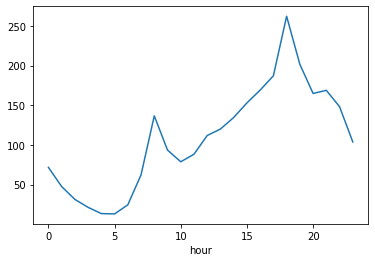

In [13]:
train.groupby('hour').mean()['count'].plot()    # 시간 별 평균 대여량 시각화

# 오전 8시쯤(출근), 오후 6시쯤(퇴근) 대여량이 크게 증가한 것을 확인할 수 있음

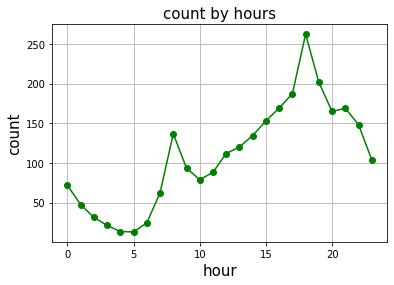

In [16]:
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()    # 보조선

plt.title('count by hours', fontsize=15)
plt.xlabel('hour', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.savefig('picture.png')   #그래프를 이미지로 저장

In [17]:
#corr(상관계수)
import seaborn as sns

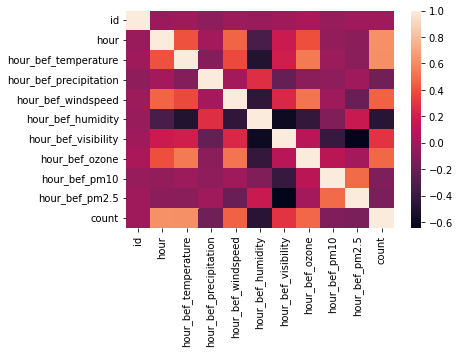

In [18]:
sns.heatmap(train.corr())

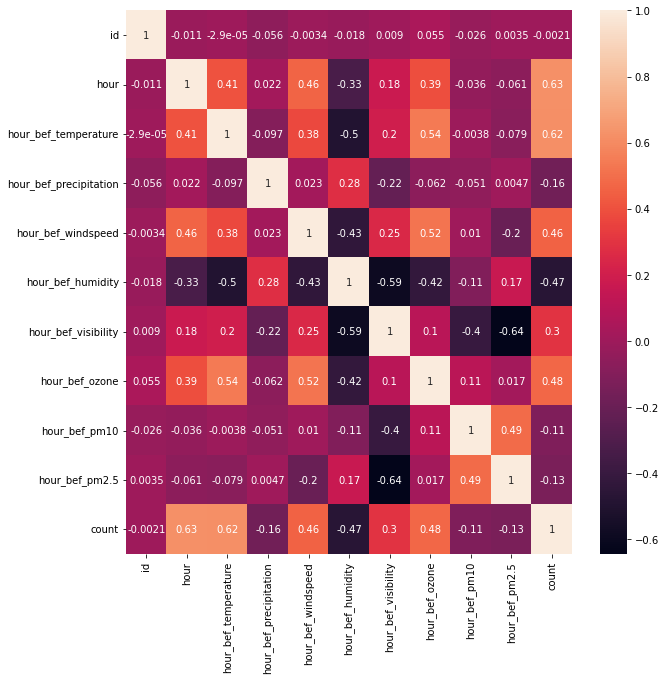

In [19]:
plt.figure(figsize=(10, 10))    # 상관관계 분석 이미지 크기 늘리기
sns.heatmap(train.corr(), annot=True)

# count 열을 보았을 때 상관계수가 높은 변수들을 채택해 모델 생성: hour, hour_bef_temperature, hour_bef_windspeed 변수를 채택해 모델 생성할 예정

In [20]:
#전처리: pre-processing & cleansing
train.isna().sum()    # isna() 와 isnull()과 같음

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [21]:
train[train['hour_bef_temperature'].isna()]   # 결측치인 행만 출력

# 자정, 오후 6시에 hour_bef_temperature의 값이 비어있음
# 온도의 경우, 평균 값으로 넣으면 해당 시간의 특성을 반영하지 못함

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [22]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [55]:
train['hour_bef_temperature'].fillna({934: 14.788136, 1035: 20.926667}, inplace=True)

# 각 시간 별 평균 기온을 출력해서 해당 값으로 NaN 값이 있는 정오, 18시 행의 hour_bef_temperature 값을 넣어줌

In [56]:
train.loc[{934, 1035}, :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0


In [24]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


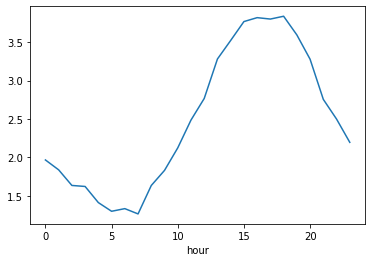

In [25]:
train.groupby('hour').mean()['hour_bef_windspeed'].plot()   # 시간대 별 풍속 평균의 시각화

In [26]:
train[train['hour_bef_windspeed'].isna()].index

Int64Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [28]:
train['hour_bef_windspeed'].fillna({18: 3.281356, 244: 1.836667, 260: 1.620000, 376: 1.965517, 780: 3.278333, 934: 1.965517, 1035: 3.838333, 1138: 2.7666})

0       1.5
1       1.4
2       0.7
3       2.7
4       4.8
       ... 
1454    1.6
1455    3.8
1456    1.9
1457    3.7
1458    3.1
Name: hour_bef_windspeed, Length: 1459, dtype: float64

In [29]:
#검토
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [30]:
#test data
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [31]:
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
test.groupby('hour').mean()['hour_bef_temperature']

hour
0     21.386667
1     20.986667
2     20.600000
3     20.203333
4     19.853333
5     19.634483
6     19.243333
7     19.190000
8     19.846667
9     21.266667
10    22.683333
11    24.110000
12    25.430000
13    26.630000
14    27.473333
15    28.040000
16    28.255172
17    27.848276
18    27.010345
19    26.110345
20    24.803333
21    23.696552
22    22.523333
23    21.926667
Name: hour_bef_temperature, dtype: float64

In [33]:
test['hour_bef_temperature'].fillna({653: 26.110345}, inplace=True)

In [45]:
test[test['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


In [34]:
test.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.986667
1     1.840000
2     1.823333
3     1.636667
4     1.543333
5     1.589655
6     1.396667
7     1.453333
8     1.446667
9     1.646667
10    1.920000
11    2.186667
12    2.636667
13    2.836667
14    2.903333
15    3.140000
16    3.406897
17    3.558621
18    3.503448
19    3.541379
20    3.406667
21    3.041379
22    2.686667
23    2.336667
Name: hour_bef_windspeed, dtype: float64

In [46]:
test['hour_bef_windspeed'].fillna({653: 3.541379}, inplace=True)

In [47]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [48]:
#랜덤포레스트 모형 구축...
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed']

X_train = train[features]
Y_train = train['count']

X_test = test[features]

In [49]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


In [68]:
X_train = X_train.astype(float)
Y_train = Y_train.astype(float)
X_test = X_test.astype(float)

In [69]:
# hyperparameter

# 해당 데이터에 가장 적합한 hyparameter 옵션을 찾는 과정 => tuning
model100 = RandomForestRegressor(n_estimators=100, random_state=0)  
model100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200) 

In [70]:
# DecisionTreeClassifier 모델 활용
import sklearn
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=0)
model_dtr = DecisionTreeRegressor()

In [71]:
model100.fit(X_train, Y_train)
model100_5.fit(X_train, Y_train)
model200.fit(X_train, Y_train)

ValueError: ignored

In [62]:
X_train = train.drop(['count'], axis=1)
Y_train = train['count']
model = DecisionTreeRegressor()


In [ ]:
df = df.astype(float)

In [63]:
model.fit(X_train, Y_train)
pred = model.predict(test)

ValueError: ignored